In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Display the first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Normalize features
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [4]:
class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.X = np.c_[np.ones((self.m, 1)), X]
        self.y = y.values.reshape(-1, 1)
        self.theta = np.zeros((self.n + 1, 1))
        
        for _ in range(self.epochs):
            gradients = 2/self.m * self.X.T.dot(self.X.dot(self.theta) - self.y)
            self.theta -= self.lr * gradients
            
    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return X.dot(self.theta)

In [5]:
model = LinearRegressionScratch()
model.fit(X_normalized, y)
predictions = model.predict(X_normalized)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y, predictions))
r2 = r2_score(y, predictions)

print(f"Linear Regression RMSE: {rmse:.4f}")
print(f"Linear Regression R²: {r2:.4f}")

Linear Regression RMSE: 0.9796
Linear Regression R²: 0.2793


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


FileNotFoundError: [Errno 2] No such file or directory: 'images/target_distribution.png'

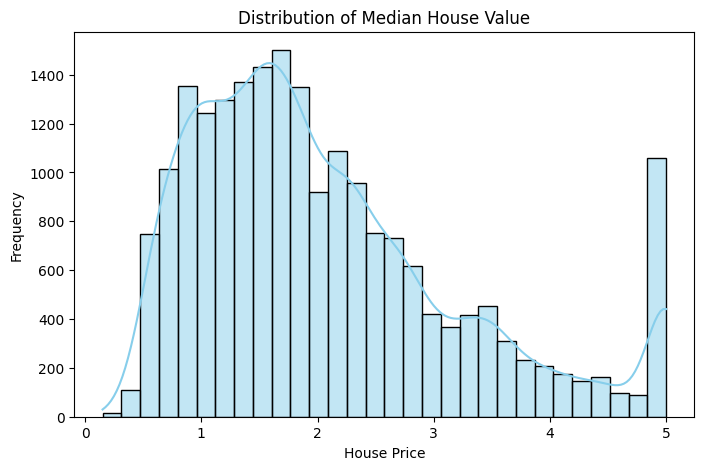

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["MedHouseVal"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Median House Value")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.savefig("images/target_distribution.png")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'images/correlation_heatmap.png'

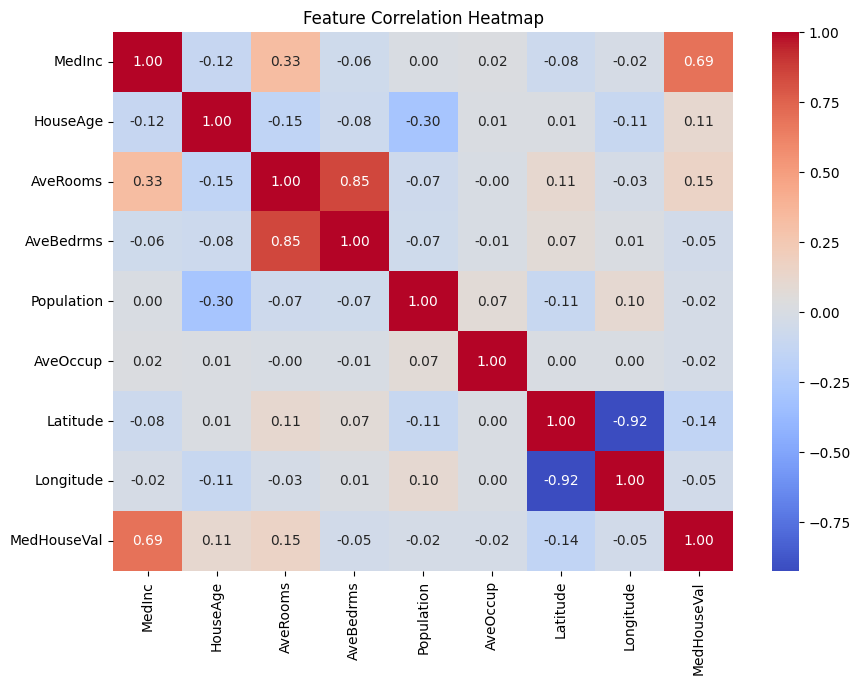

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="MedInc", y="MedHouseVal", alpha=0.5)
plt.title("Median Income vs House Price")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.savefig("images/income_vs_price.png")
plt.show()